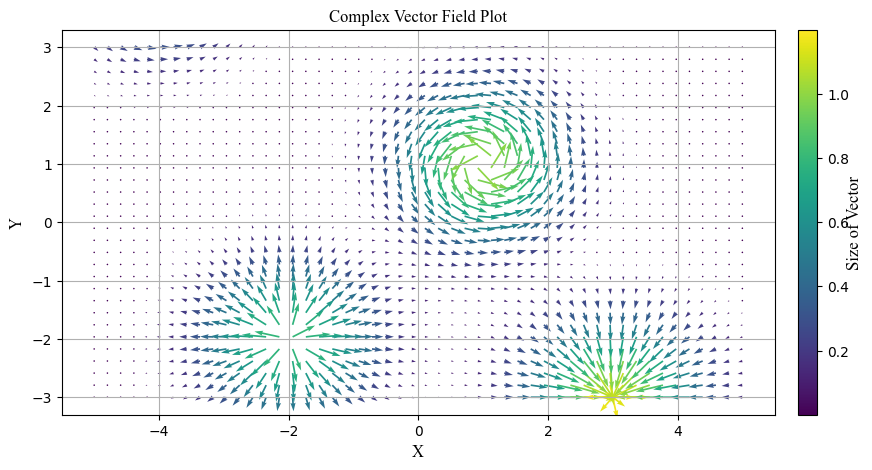

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=12)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=12)  # 设置字体路径和大小

# 创建网格
x = np.linspace(-5, 5, 50)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)

# 创建多个中心点
centers = [
    (1, 1, 1, 'rotate'),  # (x, y, strength, type)
    (-2, -2, 0.8, 'diverge'),
    (3, -3, 1.2, 'attract'),
    (-4, 4, 0.5, 'rotate')
]

# 初始化向量场
U = np.zeros_like(X)
V = np.zeros_like(Y)

# 定义每个中心点的向量场
for cx, cy, strength, vtype in centers:
    dx = X - cx
    dy = Y - cy
    dist = np.sqrt(dx**2 + dy**2)
    
    if vtype == 'rotate':
        u = -dy / dist
        v = dx / dist
    elif vtype == 'diverge':
        u = dx / dist
        v = dy / dist
    elif vtype == 'attract':
        u = -dx / dist
        v = -dy / dist
    
    # 合并向量场
    U += u * strength * np.exp(-dist**2 / 2)  # 强度随距离衰减
    V += v * strength * np.exp(-dist**2 / 2)

# 计算向量大小
M = np.sqrt(U**2 + V**2)

# 绘制矢量场图
plt.figure(figsize=(10, 5))
plt.quiver(X, Y, U, V, M, cmap='viridis', angles='xy', scale_units='xy', scale=2)

# 添加标题和标签
plt.title('Complex Vector Field Plot', fontproperties=font_en)
plt.xlabel('X', fontproperties=font_en)
plt.ylabel('Y', fontproperties=font_en)

# 添加颜色条
cbar = plt.colorbar(label='Size of Vector', orientation='vertical',fraction=0.05,  pad=0.03)# pad设置颜色条与图的距离

# 调整颜色条标签字体样式
cbar.ax.yaxis.label.set_fontproperties(font_en)
cbar.ax.yaxis.label.set_position((5, 0.5)) #修改位置, 0.1表示x轴方向的位置，0.6表示y轴方向的位置
cbar.ax.yaxis.label.set_verticalalignment('center') #修改对齐
cbar.ax.yaxis.label.set_horizontalalignment('center') #修改对齐

# 显示图形
plt.grid(True)
plt.show()